In [171]:
import numpy as np
from scipy.optimize import newton_krylov
import matplotlib.pyplot as plt

In [172]:
def radauIIstep(rhs,tn,yn,h):
    #INPUT: rhs, current solution at time t_n, step size h
    #OUTPUT: solution at time t_{n+1}
    
    def fun(p):
        x,y = p
        #print(x-rhs(tn+h/3,yn+h*(5/12*x-1/12*y)))
        return np.concatenate([x-rhs(tn+h/3,yn+h*(5/12*x-1/12*y)),y-rhs(tn+h,yn+h*(3/4*x+1/4*y))])
    
    #print(fun(np.array(y0)))
    #print(newton_krylov(fun, (yn,yn)))
    k1,k2 =  newton_krylov(fun, (yn,yn),f_tol=1e-10,f_rtol=1e-3)
    #print(fun(np.array([k1,k2])))
    #print(k1,k2)
    return yn + h*(3/4*k1 + 1/4*k2)



In [173]:
def rhs(t,y):
    return np.array([-3*y[0],-y[1]*(t+2)])


radauIIstep(rhs,tn=0.1,yn=[1,1],h=0.1)

array([0.74074074, 0.80652942])

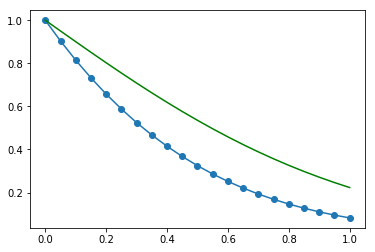

In [174]:
def uex(t):
    return np.array([np.exp(-3*t),np.exp(-0.5*t*(t+2))])


def radauIIA(rhs,t0,tf,ts,y0):
    y = np.zeros((len(y0),ts+1))
    y[:,0] = y0
#     print(y)
    #t = []
    #y.append(y0)
    #t.append(t0)
    t = np.linspace(t0,tf,ts+1)
    h = (tf-t0)/ts
    for n in range(0,ts):
        y[:,n+1] = radauIIstep(rhs,t[n],y[:,n],h)
        t[n+1] = t[n]+h
    return t,y

        
y0 = np.array([1,1])
t0=0
tf=1
ts=20
t,y = radauIIA(rhs,t0,tf,ts,y0)
plt.plot(t,y[1,:],'-o',t,uex(t)[1],'g')
plt.show()

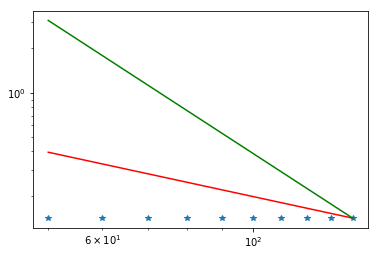

In [175]:
tsrange = np.arange(50,150,10)
err = []
for ts in tsrange:
    t0=0
    y0=[1,1]
    tf =1
    t,y = radauIIA(rhs,t0,tf,ts,y0)
    err.append(np.linalg.norm(y[:,-1]-uex(tf),np.Inf))

plt.loglog(tsrange,err,'*',tsrange,err[-1]*tsrange[-1]/tsrange,'r',tsrange,err[-1] * (tsrange[-1] / tsrange) ** 3,'g')
plt.show()